In [22]:
# Import required libraries
import pandas as pd

# reading csv data and creating dataframe
df = pd.read_csv("DRYAD_Data_Johansson_Updated2.1.csv")

# Convert 'Date of Detection' column to datetime and 'Time of Detection' to timedelta
df['Date of Detection'] = pd.to_datetime(df['Date of Detection'])
df['Time of Detection'] = pd.to_timedelta(df['Time of Detection'])

def process_dataframe(df, start_time, end_time):
    # Filter the dataframe based on the provided time range
    mask = (df['Time of Detection'] >= start_time) & (df['Time of Detection'] <= end_time)
    filtered_df = df[mask]
    
    # Group by date and species and check if count of species is greater than 0
    grouped = filtered_df.groupby(['Date of Detection', 'Species Detected']).count().unstack().fillna(0)
    boolean_df = grouped.applymap(lambda x: x > 0)
    
    return boolean_df

# File 1: dataset_2000_2359.csv
dataset_2000_2359 = process_dataframe(df, '20:00:00', '23:59:00')
dataset_2000_2359.to_csv("dataset_2000_2359.csv")

# File 2: dataset_0000_0459.csv
dataset_0000_0459 = process_dataframe(df, '00:00:00', '04:59:00')
dataset_0000_0459.to_csv("dataset_0000_0459.csv")

# File 3: dataset_2000_2359_urban.csv
mask_urban = dataset_2000_2359['Forest Cover within 1.5km of camera (km^2)'] < 0.30
dataset_2000_2359_urban = dataset_2000_2359[mask_urban]
dataset_2000_2359_urban.to_csv("dataset_2000_2359_urban.csv")

# File 4: dataset_2000_2359_rural.csv
mask_rural = dataset_2000_2359['Forest Cover within 1.5km of camera (km^2)'] >= 0.30
dataset_2000_2359_rural = dataset_2000_2359[mask_rural]
dataset_2000_2359_rural.to_csv("dataset_2000_2359_rural.csv")

# File 5: dataset_0000_0459_urban.csv
mask_urban = dataset_0000_0459['Forest Cover within 1.5km of camera (km^2)'] < 0.30
dataset_0000_0459_urban = dataset_0000_0459[mask_urban]
dataset_0000_0459_urban.to_csv("dataset_0000_0459_urban.csv")

# File 6: dataset_0000_0459_rural.csv
mask_rural = dataset_0000_0459['Forest Cover within 1.5km of camera (km^2)'] >= 0.30
dataset_0000_0459_rural = dataset_0000_0459[mask_rural]
dataset_0000_0459_rural.to_csv("dataset_0000_0459_rural.csv")

In [24]:
!conda install -y seaborn -c conda-forge
import pandas as pd

# reading csv data and creating dataframe
df = pd.read_csv("DRYAD_Data_Johansson_Updated2.1.csv")

top_5_species = df['Species Detected'].value_counts().head(5)
print(top_5_species)

done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.11.1
  latest version: 23.9.0

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.9.0



# All requested packages already installed.

Gray Squirrel        7604
White-tailed Deer    6989
Bird                 6290
Raccoon              4854
Person               4203
Name: Species Detected, dtype: int64


In [33]:
!conda install -y seaborn -c conda-forge
import pandas as pd

# reading csv data and creating dataframe
df = pd.read_csv("DRYAD_Data_Johansson_Updated2.1.csv")

midnight_species = df[df['Time of Detection'] == '00:00:00']['Species Detected'].value_counts().head(5)
print(midnight_species)

done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.11.1
  latest version: 23.9.0

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.9.0



# All requested packages already installed.

Series([], Name: Species Detected, dtype: int64)


done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.11.1
  latest version: 23.9.0

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.9.0



# All requested packages already installed.

Solving environment: done

# All requested packages already installed.



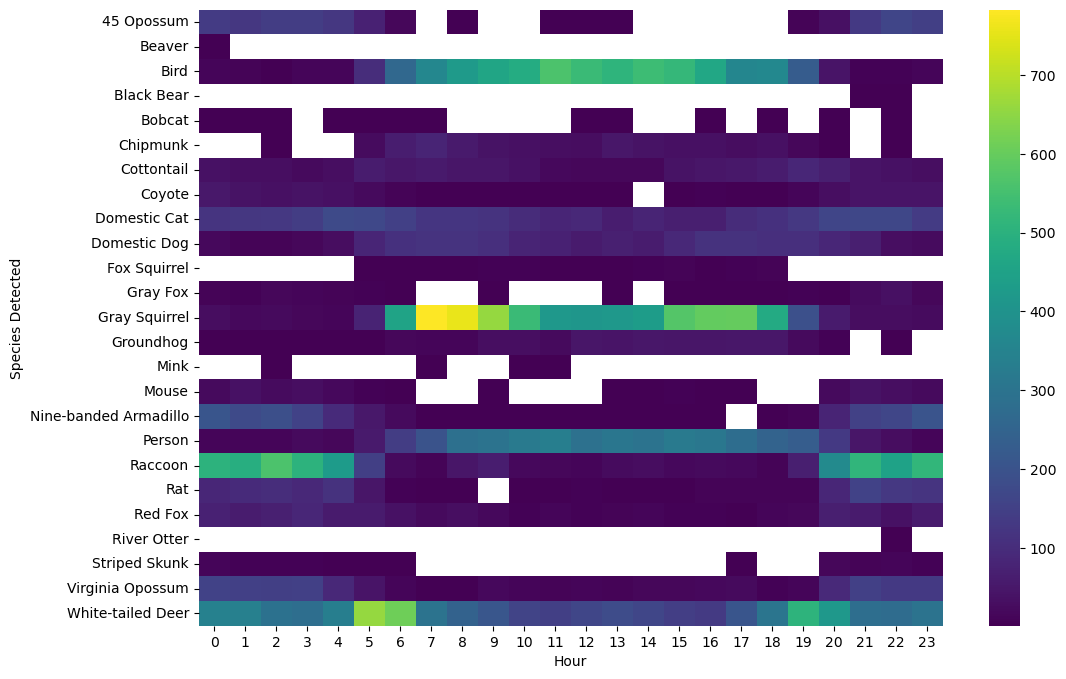

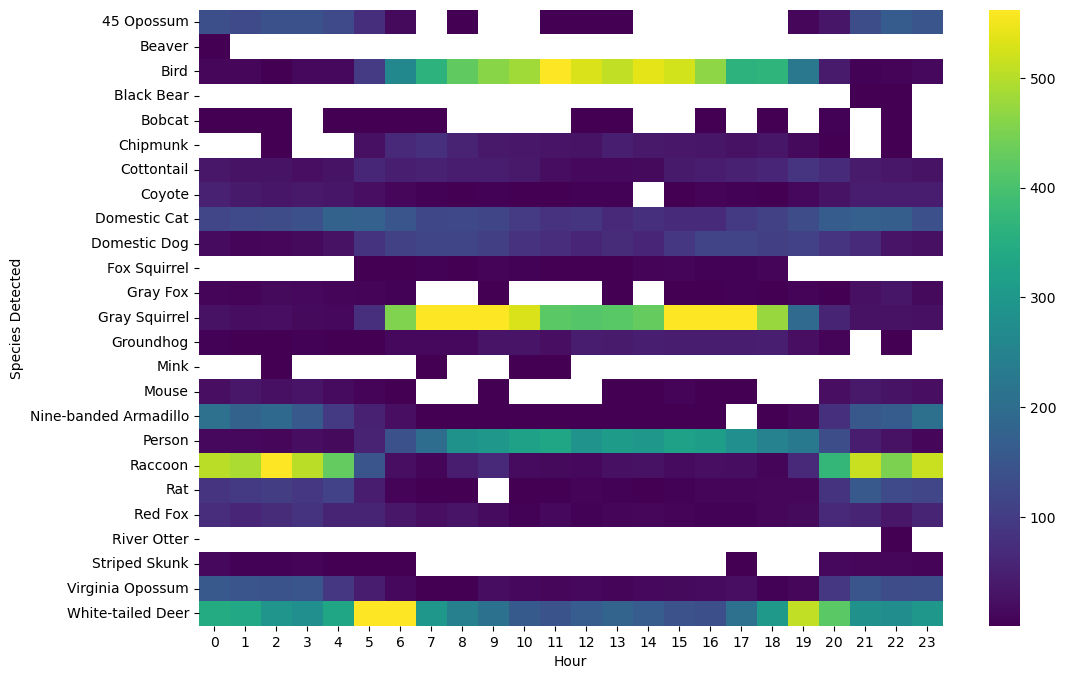

In [39]:
!conda install -y seaborn -c conda-forge
!conda update -n base -c defaults conda -y

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# reading csv data and creating dataframe
df = pd.read_csv("DRYAD_Data_Johansson_Updated2.1.csv")

# Extracting the hour from the Time of Detection column
# df['Hour'] = pd.to_datetime(df['Time of Detection'], format='mixed').dt.hour
# df['Hour'] = pd.to_datetime(df['Time of Detection'], format='%H:%M:%S').dt.hour
def convert_to_hour(time_str):
    if 'AM' in time_str or 'PM' in time_str:
        return pd.to_datetime(time_str, format='%I:%M:%S %p').hour
    else:
        return pd.to_datetime(time_str, format='%H:%M:%S').hour

df['Hour'] = df['Time of Detection'].apply(convert_to_hour)

# Creating a pivot table for heatmap
heatmap_data = df.groupby(['Species Detected', 'Hour']).size().unstack()

# Plotting heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis')
plt.show()

# Plotting heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', robust=True)
plt.show()

In [40]:
import pandas as pd

# reading csv data and creating dataframe
df = pd.read_csv("DRYAD_Data_Johansson_Updated2.1.csv")
urban_species = df[df['Forest Cover within 400m of camera (km^2)'] < 0.3]['Species Detected'].value_counts(normalize=True)
rural_species = df[df['Forest Cover within 400m of camera (km^2)'] >= 0.3]['Species Detected'].value_counts(normalize=True)

probabilities_df = pd.DataFrame({
    'urban': urban_species,
    'rural': rural_species
}).reset_index().rename(columns={'index': 'Species Detected'}).fillna(0)

print(probabilities_df)

         Species Detected     urban     rural
0              45 Opossum  0.025637  0.080905
1                  Beaver  0.000024  0.000000
2                    Bird  0.149176  0.055676
3              Black Bear  0.000024  0.000435
4                  Bobcat  0.000363  0.004350
5                Chipmunk  0.013702  0.006525
6              Cottontail  0.019174  0.069595
7                  Coyote  0.009684  0.013484
8            Domestic Cat  0.067906  0.035668
9            Domestic Dog  0.040260  0.010874
10           Fox Squirrel  0.001380  0.000000
11               Gray Fox  0.002808  0.014789
12          Gray Squirrel  0.173264  0.194432
13              Groundhog  0.011693  0.005655
14                   Mink  0.000097  0.000000
15                  Mouse  0.006197  0.003045
16  Nine-banded Armadillo  0.031302  0.103958
17                 Person  0.097828  0.070465
18                Raccoon  0.112305  0.093519
19                    Rat  0.021498  0.083515
20                Red Fox  0.01907

In [44]:
!conda install -y seaborn -c conda-forge
!conda update -n base -c defaults conda -y
!conda install pandas mlxtend -y

import datetime
import pandas as pd
from mlxtend.frequent_patterns import apriori

data = pd.read_csv("DRYAD_Data_Johansson_Updated2.1.csv")

# Convert 'Date of Detection' to datetime format
data['Date of Detection'] = pd.to_datetime(data['Date of Detection'])


def parse_time_string(time_string):
    if isinstance(time_string, datetime.time):
        return time_string
    if "PM" in time_string or "AM" in time_string:
        return datetime.datetime.strptime(time_string, '%I:%M:%S %p').time()
    else:
        return datetime.datetime.strptime(time_string, '%H:%M:%S').time()


data['Time of Detection'] = data['Time of Detection'].apply(parse_time_string)

# Filter data for early and late evening
early_evening_mask = (data['Time of Detection'] >= pd.Timestamp("21:00:00").time()) & (data['Time of Detection'] <= pd.Timestamp("23:59:00").time())
late_evening_mask = (data['Time of Detection'] >= pd.Timestamp("00:00:00").time()) & (data['Time of Detection'] <= pd.Timestamp("04:00:00").time())

early_evening_data = data[early_evening_mask]
late_evening_data = data[late_evening_mask]

# Split data based on urban and rural (using the forest cover metric as you provided)
early_urban_mask = early_evening_data['Forest Cover within 1.5km of camera (km^2)'] < 0.30
early_rural_mask = ~early_urban_mask

late_urban_mask = late_evening_data['Forest Cover within 1.5km of camera (km^2)'] < 0.30
late_rural_mask = ~late_urban_mask

early_evening_data_urban = early_evening_data[early_urban_mask]
early_evening_data_rural = early_evening_data[early_rural_mask]
late_evening_data_urban = late_evening_data[late_urban_mask]
late_evening_data_rural = late_evening_data[late_rural_mask]


def get_binary_matrix(data):
    binary_data = pd.get_dummies(data['Species Detected'])
    binary_data['Date of Detection'] = data['Date of Detection']
    binary_data = binary_data.groupby('Date of Detection').sum()
    binary_data = binary_data.fillna(0)  # Fill NaN values with 0
    return binary_data


early_evening_data_urban_binary = get_binary_matrix(early_evening_data_urban)
early_evening_data_rural_binary = get_binary_matrix(early_evening_data_rural)
late_evening_data_urban_binary = get_binary_matrix(late_evening_data_urban)
late_evening_data_rural_binary = get_binary_matrix(late_evening_data_rural)

# Merge early evening urban and rural data
early_evening_data_binary = pd.concat([early_evening_data_urban_binary, early_evening_data_rural_binary])

# Fill NaN values with 0 and dataframe cleanup
def clean_up(data):
    data = data.fillna(0)
    data = (data > 0).astype(int)
    data = data.astype(bool)
    return data

# Running the apriori function
frequent_species_early = apriori(clean_up(early_evening_data_binary), min_support=0.50, use_colnames=True)
print('--------------------TASK 1------------------')
print(frequent_species_early)

frequent_species_early_urban = apriori(clean_up(early_evening_data_urban_binary), min_support=0.50, use_colnames=True)
frequent_species_early_rural = apriori(clean_up(early_evening_data_rural_binary), min_support=0.50, use_colnames=True)
print('--------------------TASK 2------------------')
print("Urban:\n", frequent_species_early_urban)
print("\nRural:\n", frequent_species_early_rural)

frequent_species_late_urban = apriori(clean_up(late_evening_data_urban_binary), min_support=0.50, use_colnames=True)
frequent_species_late_rural = apriori(clean_up(late_evening_data_rural_binary), min_support=0.50, use_colnames=True)
print('--------------------TASK 3------------------')
print("Urban:\n", frequent_species_late_urban)
print("\nRural:\n", frequent_species_late_rural)


def get_most_frequent_itemset(data):
    if not data.empty:
        # Filter itemsets with length greater than 1
        data = data[data['itemsets'].apply(len) > 1]

        if not data.empty:
            # Sort by support and retrieve the itemset with the highest support
            most_frequent = data.sort_values(by='support', ascending=False).iloc[0]
            return most_frequent['itemsets'], most_frequent['support']

    return None, None


# Extract most frequent itemsets and their supports for each category
early_urban_species, early_urban_support = get_most_frequent_itemset(frequent_species_early_urban)
early_rural_species, early_rural_support = get_most_frequent_itemset(frequent_species_early_rural)

late_urban_species, late_urban_support = get_most_frequent_itemset(frequent_species_late_urban)
late_rural_species, late_rural_support = get_most_frequent_itemset(frequent_species_late_rural)

print('--------------------TASK 4------------------')
print(f"Early evening (urban): {early_urban_species}; sup = {early_urban_support:.2f}")
# print(f"Early evening (rural): {early_rural_species}; sup = {early_rural_support:.2f}")
if early_rural_species and early_rural_support:
    print(f"Early evening (rural): {early_rural_species}; sup = {early_rural_support:.2f}")
else:
    print("Early evening (rural): No frequent itemsets found.")
print(f"Late evening (urban): {late_urban_species}; sup = {late_urban_support:.2f}")
print(f"Late evening (rural): {late_rural_species}; sup = {late_rural_support:.2f}")

done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.11.1
  latest version: 23.9.0

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.9.0



# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

--------------------TASK 1------------------
    support                      itemsets
0  0.558577       (Nine-banded Armadillo)
1  0.767782                     (Raccoon)
2  0.604603           (White-tailed Deer)
3  0.529289  (Raccoon, White-tailed Deer)
--------------------TASK 2------------------
Urban:
     support                          itemsets
0  0.631970                    (Domestic Cat)
1  0.579926           (Nine-banded Armadillo)
2  0.799257                         (Racco